# <ins>Pymaceuticals Inc and the Power of Plots</ins> 

<b> While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.</b>

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
* Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

<hr></hr>

## Reading & Combining the Mouse Drug Data and Clinical Trial Data

In [210]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
Mouse_Drug_csv = "data/mouse_drug_data.csv"
Clinincal_Trial_csv = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
Mouse_Drug_df = pd.read_csv(Mouse_Drug_csv)
Clinical_Trial_df = pd.read_csv(Clinincal_Trial_csv)

#print(Mouse_Drug_df.head())
#print(Clinical_Trial_df.head())

# Combine the data into a single dataset
Mouse_Clinical_df = pd.merge(Clinical_Trial_df,Mouse_Drug_df, on="Mouse ID", how="left")

# Display the data table for preview
Mouse_Clinical_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [211]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_Volume_Group = Mouse_Clinical_df.groupby(['Drug','Timepoint'])
Tumor_Volume_Mean = Tumor_Volume_Group['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
Tumor_Volume_Mean_df = pd.DataFrame(Tumor_Volume_Mean)

# Preview DataFrame
Tumor_Volume_Mean_df = Tumor_Volume_Mean_df.reset_index()
Tumor_Volume_Mean_df.head()    

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [212]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumor_Volume_Group = Mouse_Clinical_df.groupby(['Drug','Timepoint'])
Tumor_Volume_Sem = Tumor_Volume_Group['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
Tumor_Volume_Sem_df = pd.DataFrame(Tumor_Volume_Sem)

# Preview DataFrame
Tumor_Volume_Sem_df = Tumor_Volume_Sem_df.reset_index()
Tumor_Volume_Sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [213]:
# Minor Data Munging to Re-Format the Data Frames
Tumor_Volume_Mean_ReFormat_df = Tumor_Volume_Mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
Tumor_Volume_Mean_ReFormat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


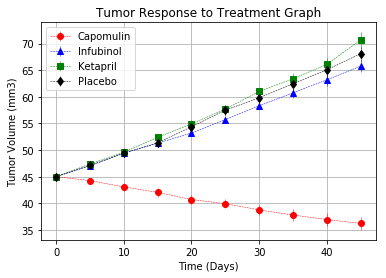

In [303]:
#Declaring the Values for x-axis, y-axis & Errors
x_axis = Tumor_Volume_Mean_ReFormat_df.index
y_axis = Tumor_Volume_Mean_ReFormat_df
err = Tumor_Volume_Sem

# Generate the Plot (with Error Bars)
plt.errorbar(x_axis, y_axis['Capomulin'], err['Capomulin'], marker="o", color="red",   fmt="--" , linewidth = 0.50)
plt.errorbar(x_axis, y_axis['Infubinol'], err['Infubinol'], marker="^", color="blue",  fmt="--" , linewidth = 0.50)
plt.errorbar(x_axis, y_axis['Ketapril'],  err['Ketapril'],  marker="s", color="green", fmt="--" , linewidth = 0.50)
plt.errorbar(x_axis, y_axis['Placebo'],   err['Placebo'],   marker="d", color="black", fmt="--" , linewidth = 0.50)

#Labelling & Layout the Graph
plt.grid()
plt.title("Tumor Response to Treatment Graph")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='best')

# Save the Figure
plt.savefig("Graphs/Tumor_Response_to_Treatment.png")

# Show the Figure
plt.show()

### <ins>Observation</ins>

From the Tumor Response to Treatment Graph, we can infer that <br> </br> 
1) The Drug <b>"Capomulin"</b> shows the best result compared to other Drugs. <br> </br>
2) The Tumor Volume of the mice taking the drug Capomulin decreases over the time point whereas for the other drugs,
the tumor volume is comparatively increasing with the same rate of time point.

# Metastatic Response to Treatment

In [215]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_Sites_Group = Mouse_Clinical_df.groupby(['Drug','Timepoint'])
Met_Sites_Mean = Met_Sites_Group['Metastatic Sites'].mean()

# Convert to DataFrame
Met_Sites_Mean_df = pd.DataFrame(Met_Sites_Mean)

# Preview DataFrame
Met_Sites_Mean_df = Met_Sites_Mean_df.reset_index()
Met_Sites_Mean_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [216]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Met_Sites_Group = Mouse_Clinical_df.groupby(['Drug','Timepoint'])
Met_Sites_Sem = Met_Sites_Group['Metastatic Sites'].sem()

# Convert to DataFrame
Met_Sites_Sem_df = pd.DataFrame(Met_Sites_Sem)

# Preview DataFrame
Met_Sites_Sem_df = Met_Sites_Sem_df.reset_index()
Met_Sites_Sem_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [217]:
# Minor Data Munging to Re-Format the Data Frames
Met_Sites_Mean_ReFormat_df = Met_Sites_Mean_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
Met_Sites_Mean_ReFormat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


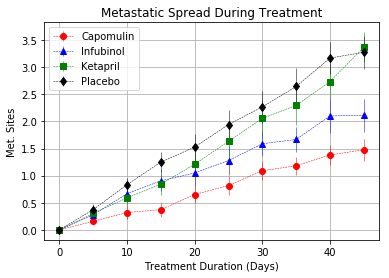

In [305]:
#Declaring the Values for x-axis, y-axis & Errors
x_axis = Met_Sites_Mean_ReFormat_df.index
y_axis = Met_Sites_Mean_ReFormat_df
err = Met_Sites_Sem

# Generate the Plot (with Error Bars)
plt.errorbar(x_axis, y_axis['Capomulin'], err['Capomulin'], marker="o", color="red",   fmt="--" , linewidth = 0.5)
plt.errorbar(x_axis, y_axis['Infubinol'], err['Infubinol'], marker="^", color="blue",  fmt="--" , linewidth = 0.5)
plt.errorbar(x_axis, y_axis['Ketapril'],  err['Ketapril'],  marker="s", color="green", fmt="--" , linewidth = 0.5)
plt.errorbar(x_axis, y_axis['Placebo'],   err['Placebo'],   marker="d", color="black", fmt="--" , linewidth = 0.5)

#Labelling & Layout the Graph
plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc='best')

# Save the Figure
plt.savefig("Graphs/Metastatic_Response_to_Treatment.png")

# Show the Figure
plt.show()

### <ins>Observation</ins>

From the Metastatic Spread During Treatment Graph, we can infer that <br> </br>
1) Metastatic spread is increasing for all the drugs over the time period. <br> </br>
2) The Mice taking the Capomulin Drug had the least spread in Metastatic rate.<br> </br>
3) The Mice taking the Placebo Drug had the highest spread in Metastatic rate. <br> </br>

## Survival Rates

In [219]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice_Group = Mouse_Clinical_df.groupby(['Drug','Timepoint'])
Mice_Count = Mice_Group['Mouse ID'].nunique()

# Convert to DataFrame
Mice_Count_df = pd.DataFrame(Mice_Count)
# Preview DataFrame
Mice_Count_df = Mice_Count_df.reset_index()
Mice_Count_df = Mice_Count_df.rename(columns = {'Mouse ID':'Mouse Count'})
Mice_Count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [220]:
# Minor Data Munging to Re-Format the Data Frames
Mice_Count_ReFormat_df = Mice_Count_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
Mice_Count_ReFormat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


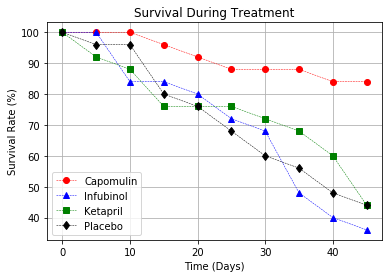

In [307]:
#Declaring the Values for x-axis & Calculating the Percentages
x_axis = Mice_Count_ReFormat_df.index
Count = Mice_Count_ReFormat_df
Capomulin_Percent = (Count['Capomulin']/Count['Capomulin'][0]) * 100
Infubinol_Percent = (Count['Infubinol']/Count['Infubinol'][0]) * 100
Ketapril_Percent  = (Count['Ketapril']/Count['Ketapril'][0]) * 100
Placebo_Percent   = (Count['Placebo']/Count['Placebo'][0]) * 100

# Generate the Plot (Accounting for percentages)
plt.plot(x_axis, Capomulin_Percent, marker="o", color="red",   ls="--" , linewidth = 0.5)
plt.plot(x_axis, Infubinol_Percent, marker="^", color="blue",  ls="--" , linewidth = 0.5)
plt.plot(x_axis, Ketapril_Percent,  marker="s", color="green", ls="--" , linewidth = 0.5)
plt.plot(x_axis, Placebo_Percent,   marker="d", color="black", ls="--" , linewidth = 0.5)

#Labelling & Layout the Graph
plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc='best')


# Save the Figure
plt.savefig("Graphs/Survival_Rates.png")

# Show the Figure
plt.show()

### <ins>Obseravtion</ins>

From the Survival During Treatment Graph, we can infer that <br></br>
1) The mice taking the Capomulin drug had the highest survival rate of about 85%. <br> </br>
2) The mice taking the Infubinol drug had the least survival rate of about 35%. <br> </br>

## Summary Bar Graph

In [222]:
# Calculate the percent changes for each drug
Change = Tumor_Volume_Mean_ReFormat_df
Percent_Change = ((Change.iloc[-1] - Change.iloc[0])/Change.iloc[0]) * 100

# Display the data to confirm
Percent_Change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

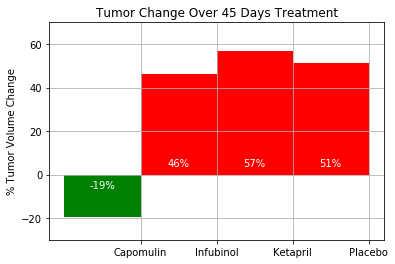

In [309]:
# Store all Relevant Percent Changes into a Tuple

Drug = ['Capomulin','Infubinol','Ketapril','Placebo']
Tuple = [Percent_Change[x] for x in Drug]

# Splice the data between passing and failing drugs

Splice = ['red' if value > 0 else 'green' for value in Tuple ]

# Orient widths. Add labels, tick marks, etc. 

Plot = plt.bar(Drug, Tuple, color=Splice, width = -1, align = 'edge')
plt.xticks(Drug)
plt.grid()
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.ylim(-30, 70)

# Use functions to label the percentages of changes
#source - http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/

def percent_label(rects):

 for rect in rects:
        height = rect.get_height()
        if height > 0:
            pos = 3
        else:
            pos = -7
        plt.text(rect.get_x() + rect.get_width()/2.,pos,'%d'%int(height)+'%',ha='center', va='bottom', color='white')


# Call functions to implement the function calls
percent_label(Plot)

# Save the Figure
plt.savefig("Graphs/Summary_Bar_Graph.png")

# Show the Figure
plt.show()

### <ins> Observation </ins>

From the Tumor Change Over 45 Days Treatment Bar Graph, we can infer that <br></br>
1) The mice taking the Capomulin drug reduced the tumor size by 19% over the 45 Days treatment. <br> </br>
2) The mice taking the other drugs increased the tumor size by almost 45-60% over the time period. 

### <ins>Conclusion </ins>

Analysing the 4 Drugs (Capomulin, Infubinol, Ketapril, Placebo) , we can conclude that the Drug <b>Campomulin</b> is the best anti-cancer drug compared to the other drugs. This drug had reduced the tumor size of the mice by 19% over the 45 Days treatment period. The Survival rate of taking this drug is about 85% with the least Metastatic rate. The Tumor Volume of the mice taking the drug Capomulin decreases over the time point compared to the other 3 drugs.


